In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
handStrengths = [[59484, 371762, 314277, 71868, 79684, 53049, 46457, 3066, 353]]
handStrengths = [float(tally)/sum(handStrengths[0]) for tally in handStrengths[0]]
print(handStrengths)

[0.059484, 0.371762, 0.314277, 0.071868, 0.079684, 0.053049, 0.046457, 0.003066, 0.000353]


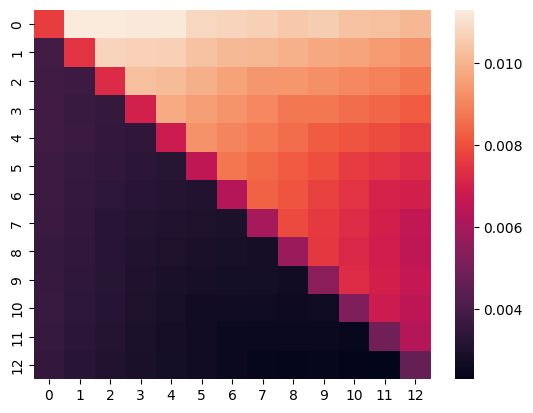

In [3]:
# Total percentage of wins given starting hand
handChart = [[0.0076734, 0.0112917, 0.0113034, 0.011254,  0.0112036, 0.0108413, 0.0107685, 0.0106611, 0.0104874, 0.0105734, 0.0103364, 0.010279, 0.0100956 ],
             [0.0039152, 0.0074686, 0.0107701, 0.0106889, 0.0106433, 0.0103249, 0.0101156, 0.0100731, 0.0099404, 0.0097845, 0.0096614, 0.0094553, 0.0092912],
             [0.003845,  0.0037238, 0.0072868, 0.0102682, 0.0101772, 0.0099253, 0.009647,  0.0093888, 0.0093589, 0.0092032, 0.0090575, 0.0089227, 0.0087244],
             [0.0038455, 0.0036672, 0.0035452, 0.0069966, 0.0098007, 0.0095133, 0.0093176, 0.0090731, 0.0087481, 0.008739,  0.0085444, 0.0084063, 0.0081908],
             [0.003829,  0.003704,  0.003495,  0.0034349, 0.0068271, 0.0092862, 0.0090038, 0.0087947, 0.0085443, 0.008226,  0.008088,  0.007935,  0.0077397],
             [0.0037234, 0.0035734, 0.0034718, 0.0033327, 0.0032441, 0.0065533, 0.0087083, 0.0084788, 0.0081947, 0.0079776, 0.0076145, 0.0074516, 0.0072867],
             [0.0037075, 0.0035426, 0.0033745, 0.0032589, 0.0031565, 0.0030818, 0.0062929, 0.0083216, 0.0080818, 0.0077408, 0.0074364, 0.0070738, 0.006959 ],
             [0.0036972, 0.0035202, 0.0032677, 0.0031748, 0.0030829, 0.0029905, 0.0029354, 0.0060022, 0.0079188, 0.007607,  0.0073257, 0.006966,  0.0065744],
             [0.003597,  0.0034646, 0.0032483, 0.0030818, 0.0029992, 0.0029088, 0.0028742, 0.0028175, 0.0057607, 0.0075685, 0.0072148, 0.0069102, 0.0065251],
             [0.0036306, 0.0033949, 0.0032372, 0.0030709, 0.0029018, 0.002829,  0.0027585, 0.0027619, 0.0026923, 0.0054859, 0.0073261, 0.0069528, 0.0066466],
             [0.0036364, 0.0033538, 0.0031784, 0.002992,  0.0028656, 0.002697,  0.0026853, 0.002621,  0.0026104, 0.0026304, 0.0051992, 0.006807,  0.006464 ],
             [0.0035716, 0.0033266, 0.0031475, 0.0029626, 0.002819,  0.0027082, 0.0025565, 0.0025411, 0.0025173, 0.0025231, 0.0024553, 0.0048936, 0.006277 ],
             [0.0035224, 0.003251,  0.003078,  0.0029063, 0.0027752, 0.0026913, 0.0025364, 0.0024311, 0.0023822, 0.002414,  0.0023677, 0.0022975, 0.0046221]]
        
sns.heatmap(handChart)
plt.show()

In [ ]:
# Normalize for combinations that can make up that hand
#  For example, 6 combos of AA, but only 4 combos of AKs and 12 combos of AKo 
#  So, the average combinations of hands should be 1326/169 = 7.84
#  The normalized hand chart should be 7.84/combos
#  Right now, the hand chart is randomly draw two cards, and then see which wins
#  
normalizedHandChart = [hand/sum(hand) for hand in handChart]

Winning Hand Counts, greater than minor diagonal is suited
          ACE    KING   QUEEN   JACK    TEN   NINE  EIGHT  SEVEN    SIX   FIVE   FOUR  THREE    TWO
ACE     77301   38839   38559  38492  38263  37320  37351  36892  36367  36489  36290  35685  35122
KING   113419   74326   37446  36674  36457  35563  35412  34925  34693  34101  33710  33187  32664
QUEEN  112402  107579   72279  35670  35237  34453  33739  32874  32354  32313  31584  31200  30812
JACK   112267  107083  102362  70560  34018  33611  32533  32051  31155  30726  30246  29821  29118
TEN    110989  105715  101926  98192  67440  32589  31586  30947  30069  29255  28461  27986  27641
NINE   108314  103404   99234  95699  92604  65453  30600  30096  29055  28560  27158  26821  26424
EIGHT  107609  100961   96763  92959  90327  87253  63109  29438  28592  27457  26502  25421  25260
SEVEN  107160  100468   94493  90667  88050  85290  83222  60184  28161  27198  26154  25174  24257
SIX    105367   99320   93323  87563  85191  82333  80612  79281  57359  27121  26322  25276  23978
FIVE   105399   97777   92023  87275  82029  79515  77702  76036  75643  55101  26496  25155  24243
FOUR   104367   96412   90149  85832  80745  76059  74140  72692  72702  73020  52170  24650  23821
THREE  102535   94399   89170  83699  79350  74791  70637  69027  69337  69872  68410  49041  23102
TWO    100769   93144   87585  82463  77575  73040  69299  65631  65440  66202  64403  63343  46128

Strength of Board vs Strength of Winning Hand
               HIGHCARD     PAIR  TWOPAIR   TRIPS  STRAIGHT   FLUSH    BOAT  QUADS  STRAIGHTFLUSH
HIGHCARD         593349  2699737   706251  122719    571862  314903       0      0           2203
PAIR                  0  1011615  2123191  506058    186885  179727  209902   7700            810
TWOPAIR               0        0   314972       0      3795    8007  147179   1723             27
TRIPS                 0        0        0   88798      1387    2066  101193  18078             10
STRAIGHT              0        0        0       0     36726    2314       0      0            216
FLUSH                 0        0        0       0         0   19429       0      0            351
BOAT                  0        0        0       0         0       0   13037   1269              0
QUADS                 0        0        0       0         0       0       0   2367              0
STRAIGHTFLUSH         0        0        0       0         0       0       0      0            144